In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [49]:
creditcard_df = pd.read_csv('Marketing_data.csv')
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [50]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [51]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


# Visualizing the dataset

In [52]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [53]:
# Let's see who made cash advance of $47137!
# This customer made 123 cash advance transactions!!
# Never paid credit card in full

creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


<Axes: >

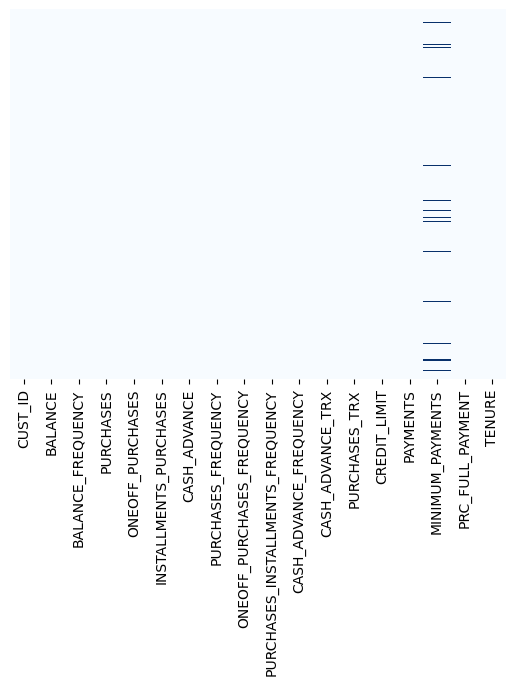

In [54]:
# Let's see if we have any missing data, luckily we don't!
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [55]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [56]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()


In [57]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<Axes: >

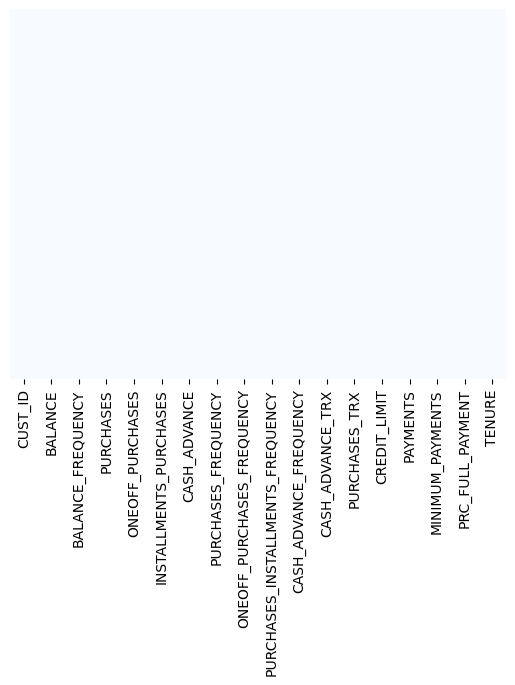

In [58]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [59]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()

0

In [60]:
# Let's drop Customer ID since it has no meaning here 
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [61]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [62]:
n = len(creditcard_df.columns)
n

17

In [63]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

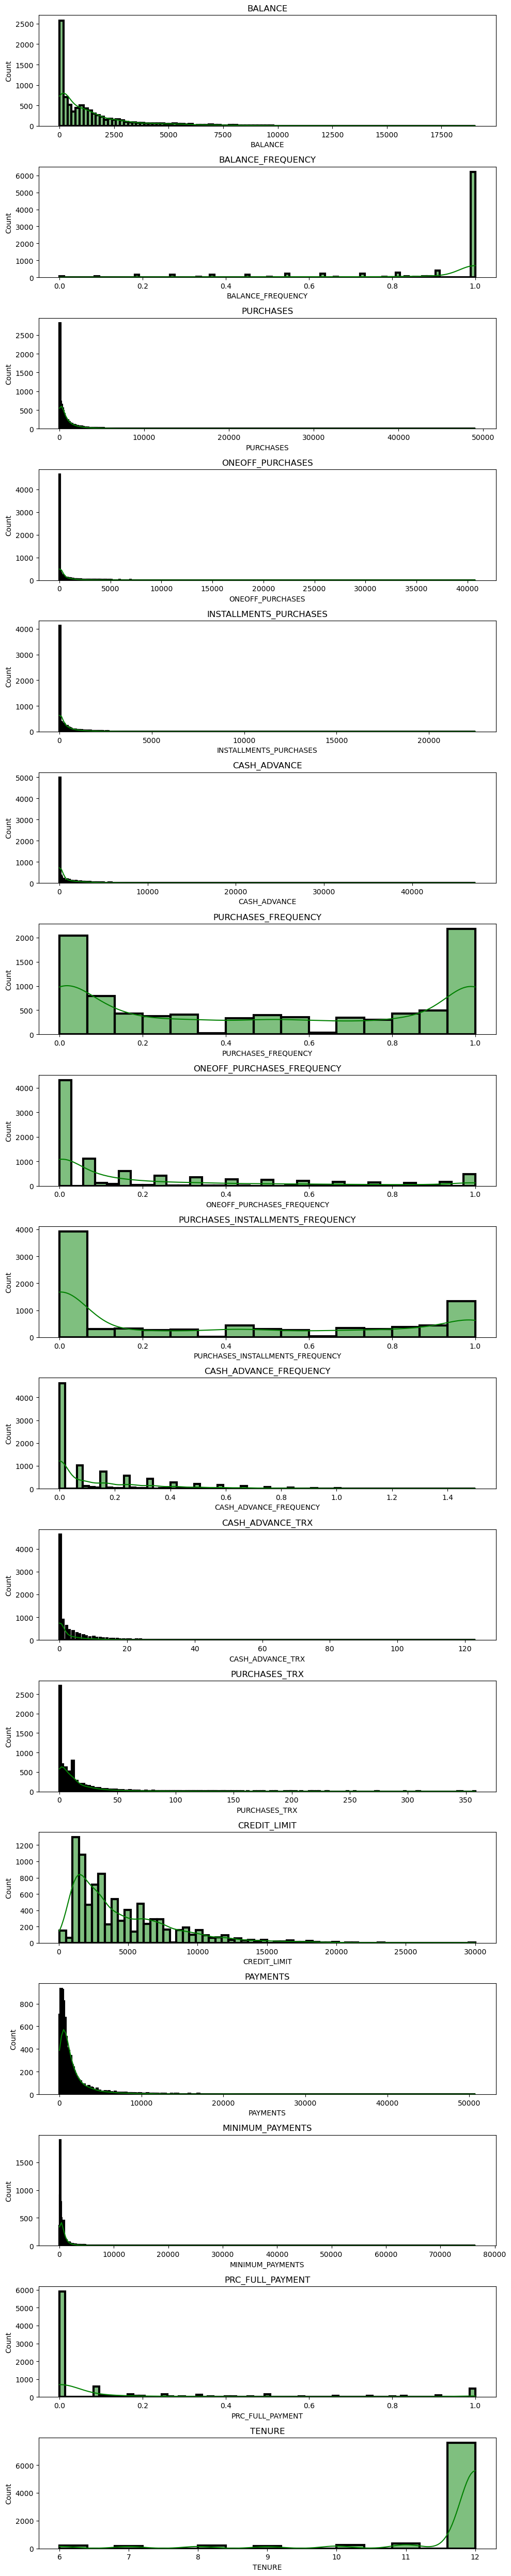

In [64]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

# Mean of balance is $1500
# 'Balance_Frequency' for most customers is updated frequently ~1
# For 'PURCHASES_FREQUENCY', there are two distinct group of customers
# For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
# Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
# Credit limit average is around $4500
# Most customers are ~11 years tenure

plt.figure(figsize=(10, 50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i+1)
    sns.histplot(creditcard_df[creditcard_df.columns[i]], kde=True, color="g", linewidth=3, label="KDE")
    plt.title(creditcard_df.columns[i])
plt.tight_layout()





In [65]:
correlations = creditcard_df.corr()

<Axes: >

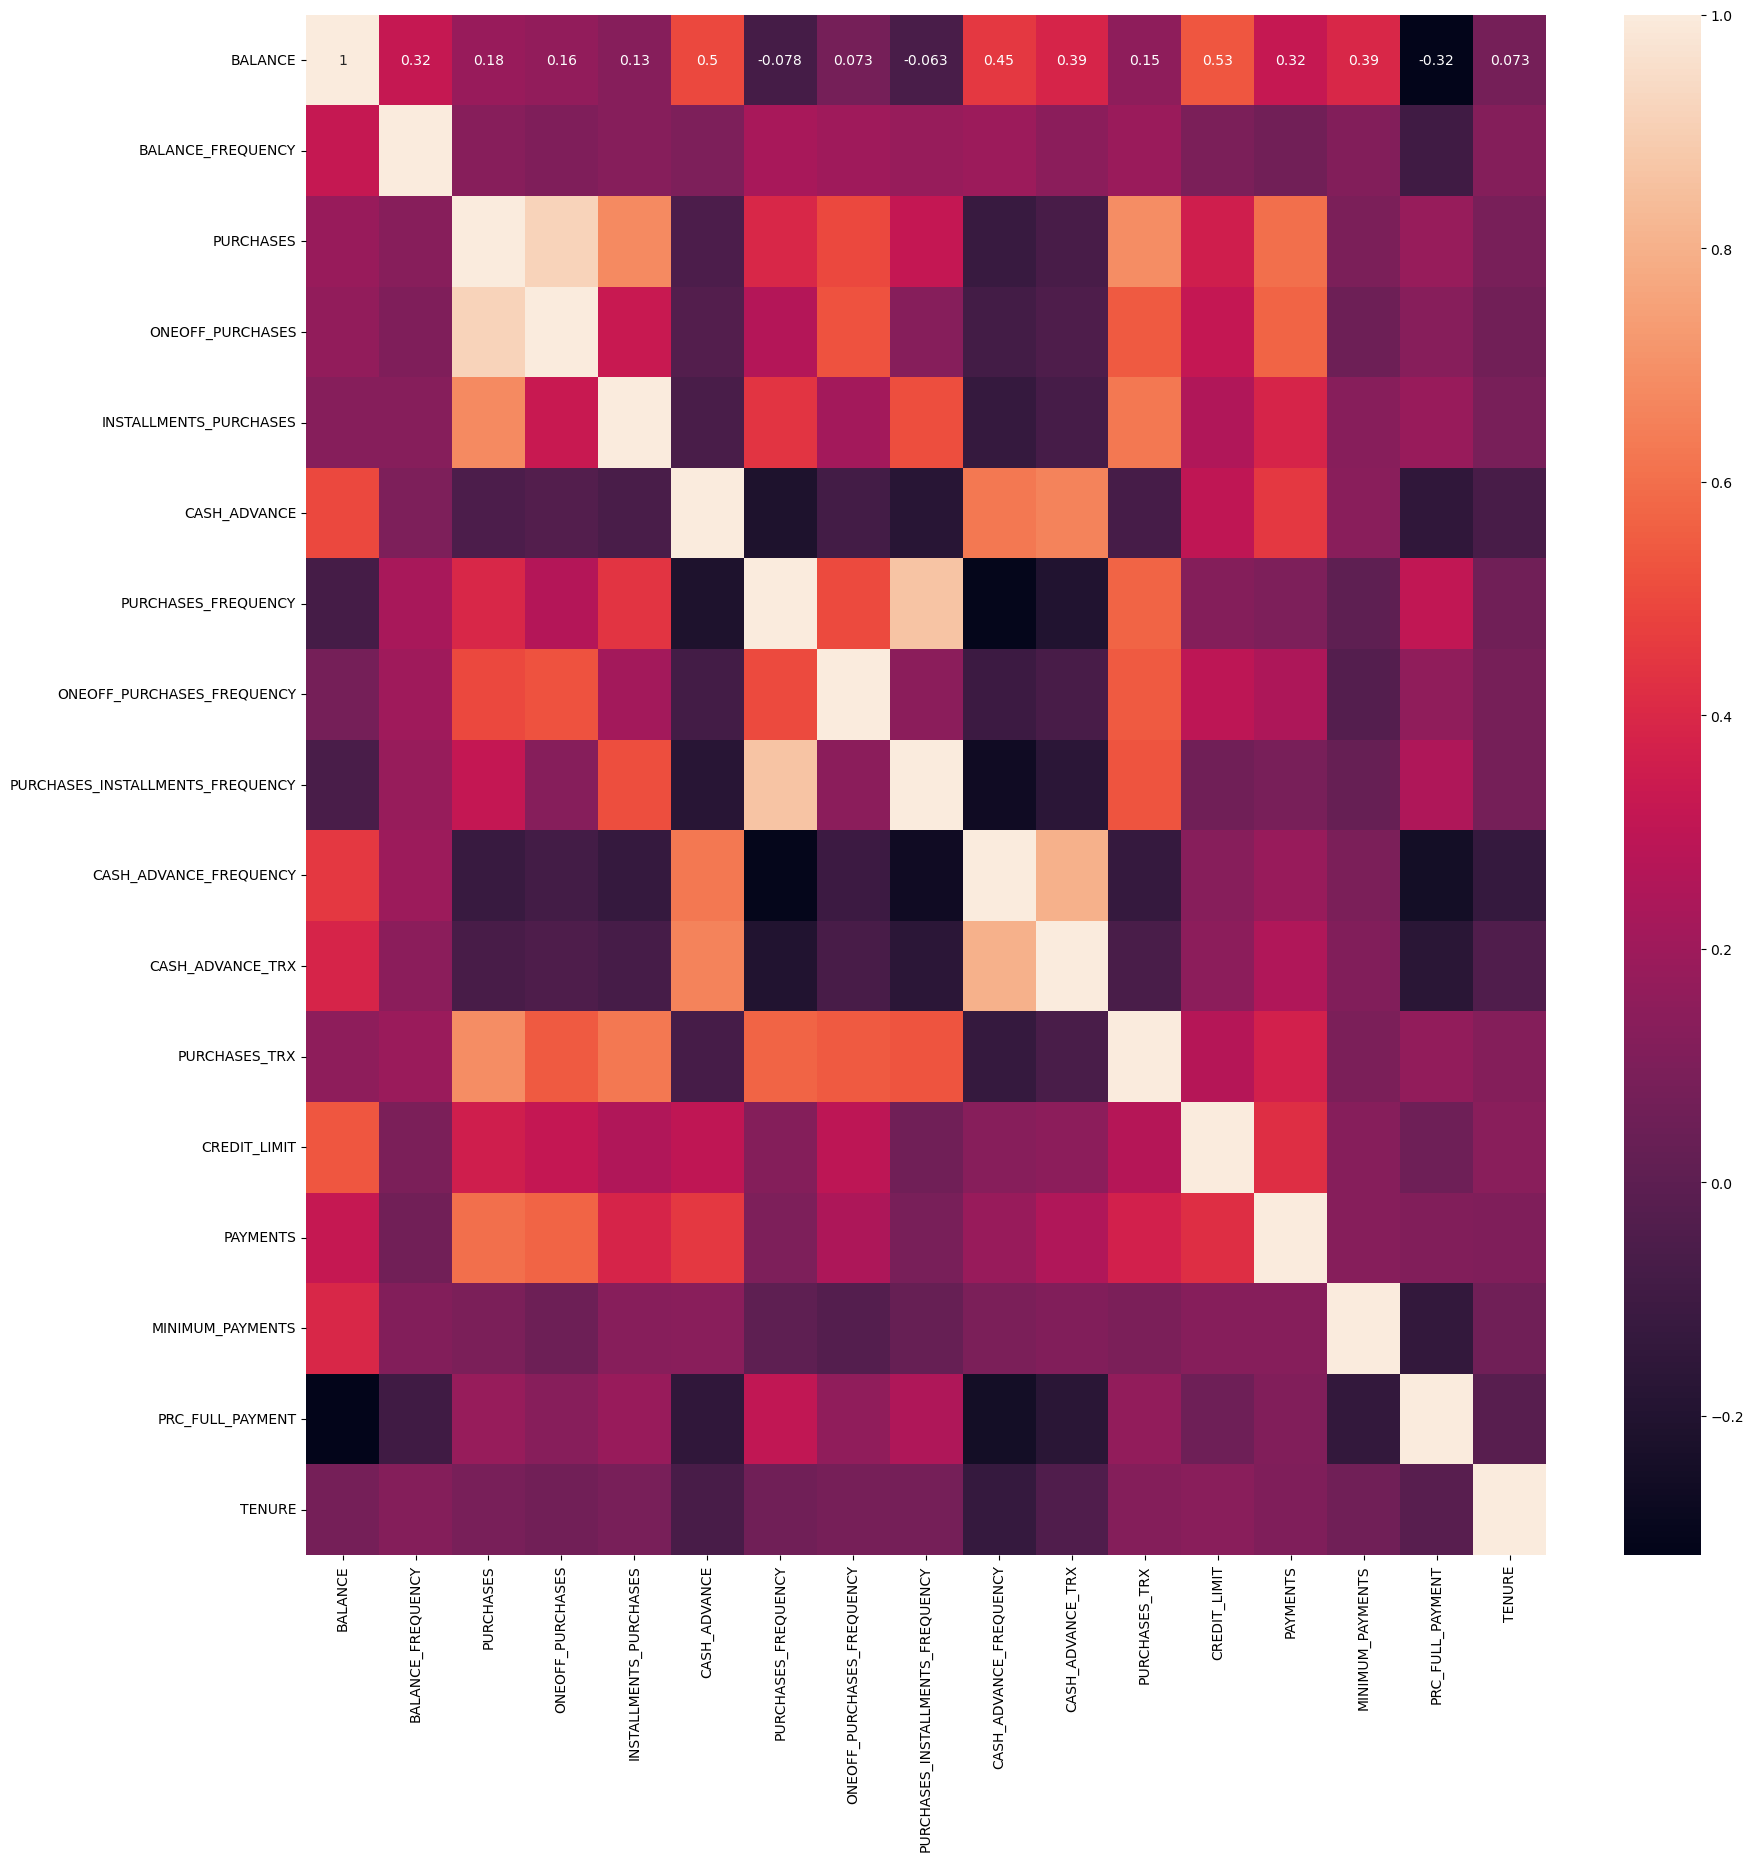

In [66]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

In [67]:
# 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments. 
# Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

In [68]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

In [69]:
creditcard_df_scaled.shape

(8950, 17)

In [70]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

# DBSCAN Algorithm

In [71]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Finding the optimal values of min samples and Epsilon

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define a range of values for epsilon and min_samples
eps_values = np.arange(0.1, 1.0, 0.5)  # Adjust the range of eps values according to your data
min_samples_values = range(8, 9)  # Adjust the range of min_samples values according to your data

# Initialize lists to store parameter values and silhouette scores
eps_list = []
min_samples_list = []
silhouette_scores = []

best_score = -1
best_eps = None
best_min_samples = None

# Loop through parameter combinations and calculate silhouette scores
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(creditcard_df_scaled)
        silhouette_avg = silhouette_score(creditcard_df_scaled, dbscan.labels_)
        print(f"Epsilon : {eps},  Min Samples={best_min_samples} and Silhouette Score={best_score}")
        
        # Store parameter values and silhouette scores
        eps_list.append(eps)
        min_samples_list.append(min_samples)
        silhouette_scores.append(silhouette_avg)
        
        # Update best parameters if silhouette score improves
        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_eps = eps
            best_min_samples = min_samples

print(f"Best Parameters: Epsilon={best_eps}, Min Samples={best_min_samples}, Silhouette Score={best_score}")

# # Plot silhouette scores vs. parameter combinations with additional info on the horizontal axis
# plt.figure(figsize=(12, 6))
# plt.plot(range(len(silhouette_scores)), silhouette_scores, marker='o')
# plt.xlabel('Parameter Combination (Epsilon, Min Samples)')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Scores vs. Parameter Combinations')
# plt.xticks(range(len(silhouette_scores)), [f"({eps_list[i]}, {min_samples_list[i]})\nEps={eps_list[i]}, Min_Samples={min_samples_list[i]}" for i in range(len(silhouette_scores))], rotation=45, ha='right', fontsize=8)
# plt.axvline(x=silhouette_scores.index(best_score), color='r', linestyle='--', label='Best Parameters')
# plt.legend()
# plt.tight_layout()
# plt.show()


Epsilon : 0.1,  Min Samples=None and Silhouette Score=-1
Epsilon : 0.6,  Min Samples=8 and Silhouette Score=-0.25322845911882724
Best Parameters: Epsilon=0.1, Min Samples=8, Silhouette Score=-0.25322845911882724


# finding the optimal number of clusters DBSCAN

In [73]:
from sklearn.cluster import DBSCAN

# Optimal values for eps and min_samples
eps_optimal = 0.95
min_samples_optimal = 9

# Fit DBSCAN with optimal parameters
dbscan = DBSCAN(eps=eps_optimal, min_samples=min_samples_optimal)
dbscan.fit(creditcard_df_scaled)

#***********************************************/
# # Extract cluster labels
# cluster_labels = dbscan.labels_

# # Count unique labels (excluding noise points)
# num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)

# print(f"Number of clusters found by DBSCAN: {num_clusters}")

    
#*****************************************************/
# Extract cluster labels
cluster_labels = dbscan.labels_

# Convert cluster labels to start from 0 and be contiguous
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_contiguous = label_encoder.fit_transform(cluster_labels)

# The 'labels_contiguous' variable now contains the cluster labels starting from 0
print("Cluster labels assigned by DBSCAN (contiguous):")
print(labels_contiguous)

# Calculate the number of clusters found by DBSCAN
unique_labels = np.unique(labels_contiguous)
n_clusters = len(unique_labels) - (1 if -1 in cluster_labels else 0)
print("Number of clusters found by DBSCAN:", n_clusters)


Cluster labels assigned by DBSCAN (contiguous):
[1 0 1 ... 1 0 0]
Number of clusters found by DBSCAN: 3


# Apply DBSCAN

In [74]:
from sklearn.cluster import DBSCAN

# Assuming 'creditcard_df_scaled' contains your scaled data

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=0.95, min_samples=10)
labels = dbscan.fit_predict(creditcard_df_scaled)

# The 'labels' variable now contains the cluster labels assigned by DBSCAN to each data point
print("Cluster labels assigned by DBSCAN:")
print(labels)

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert cluster labels to start from 0 and be contiguous
labels_contiguous = label_encoder.fit_transform(labels)

# The 'labels_contiguous' variable now contains the cluster labels starting from 0
print("Cluster labels assigned by DBSCAN (contiguous):")
print(labels_contiguous)



Cluster labels assigned by DBSCAN:
[ 0 -1  0 ...  0 -1 -1]
Cluster labels assigned by DBSCAN (contiguous):
[1 0 1 ... 1 0 0]


In [75]:
import numpy as np

# Assuming 'labels' contains the cluster labels assigned by DBSCAN
unique_labels = np.unique(labels_contiguous)
n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
print("Number of clusters found by DBSCAN:", n_clusters)


Number of clusters found by DBSCAN: 3


In [76]:
# Assuming 'creditcard_df' contains your original data and 'labels' contains the cluster labels assigned by DBSCAN

# Initialize an empty list to store cluster centers
cluster_centers_list = []

# Compute cluster centers
for cluster_label in np.unique(labels_contiguous):
    if cluster_label == -1:
        continue  # Skip noise points
    cluster_data = creditcard_df[labels_contiguous == cluster_label]
    cluster_center = cluster_data.mean()
    cluster_centers_list.append(cluster_center)

# Convert the list of cluster centers to a DataFrame
cluster_centers = pd.DataFrame(cluster_centers_list, columns=creditcard_df.columns)

# Display cluster centers
print("Cluster centers computed from DBSCAN:")
print(cluster_centers)


Cluster centers computed from DBSCAN:
       BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
0  2348.253358           0.895441  1825.090530       1143.256455   
1   958.545726           0.862148   357.549833        157.529304   
2    78.618141           0.983957   819.392353        804.715294   
3    78.771181           0.955556   333.008000         52.000000   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0              682.214102   1723.125487             0.599150   
1              200.260148    399.991345             0.400949   
2               14.677059     18.406103             0.960784   
3              281.008000      0.000000             0.955556   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.334938                          0.431661   
1                    0.093081                          0.313400   
2                    0.960784                          0.014706   
3                    0.022222   

In [77]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4.889256e+06,1.089392,3.900337e+06,1.898164e+06,617328.815559,3.614454e+06,0.730819,0.302376,0.535990,0.175149,39.726585,620.900032,2.302549e+07,8.720688e+06,3.211257e+06,0.205802,26.533594
1,1.996696e+06,1.081506,7.649139e+05,2.620588e+05,181503.835099,8.397794e+05,0.651271,0.230226,0.488990,0.152184,14.316350,191.077568,1.108699e+07,2.123765e+06,1.084925e+06,0.191453,27.242363
2,1.652015e+05,1.110361,1.751648e+06,1.336255e+06,13683.349827,3.957733e+04,0.875960,0.489078,0.370282,0.135635,3.850968,359.773212,2.046811e+07,2.533121e+06,3.987454e+05,0.426594,27.576390
3,1.655200e+05,1.103633,7.124799e+05,8.690179e+04,254523.115320,9.788711e+02,0.873861,0.209087,0.690106,0.135144,3.248827,243.387428,4.370585e+06,6.138933e+05,3.161038e+05,0.248423,23.293971


In [78]:
labels_contiguous.shape 

(8950,)

In [79]:
labels_contiguous.max()

3

In [80]:
labels_contiguous.min()

0

In [81]:
from sklearn.cluster import DBSCAN

# Assuming 'creditcard_df_scaled' contains your scaled data

# Initialize and fit DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=10)
labels = dbscan.fit_predict(creditcard_df_scaled)

print("unique labels",np.unique(labels))

# The 'labels' variable now contains the cluster labels assigned by DBSCAN to each data point
print("Cluster labels assigned by DBSCAN:")
print(labels)

label_encoder = LabelEncoder()

# Convert cluster labels to start from 0 and be contiguous
labels_contiguous = label_encoder.fit_transform(labels)

# The 'labels_contiguous' variable now contains the cluster labels starting from 0
print("Cluster labels assigned by DBSCAN (contiguous):")
print(labels_contiguous)


unique labels [-1  0  1  2  3  4  5  6  7]
Cluster labels assigned by DBSCAN:
[ 0 -1 -1 ... -1 -1 -1]
Cluster labels assigned by DBSCAN (contiguous):
[1 0 0 ... 0 0 0]


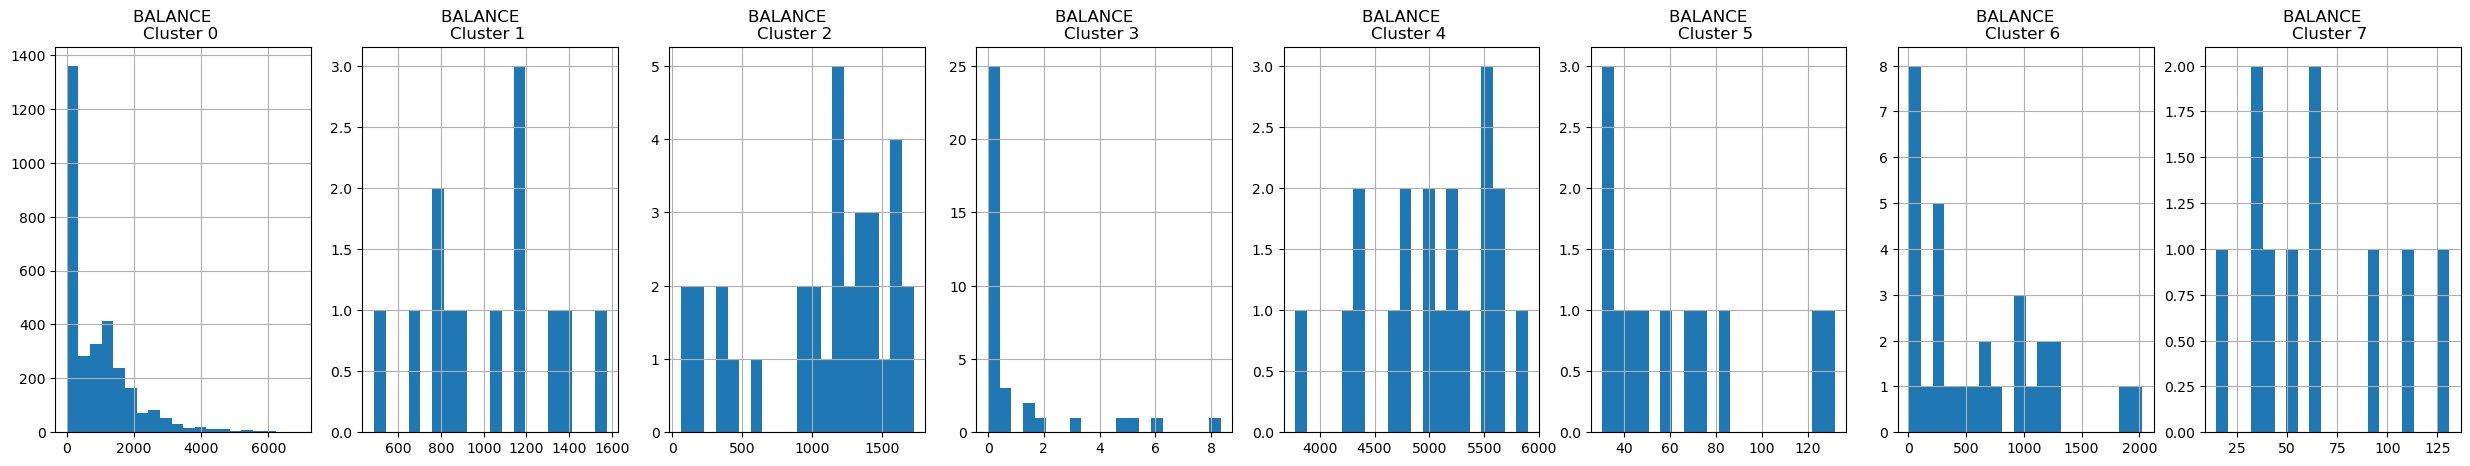

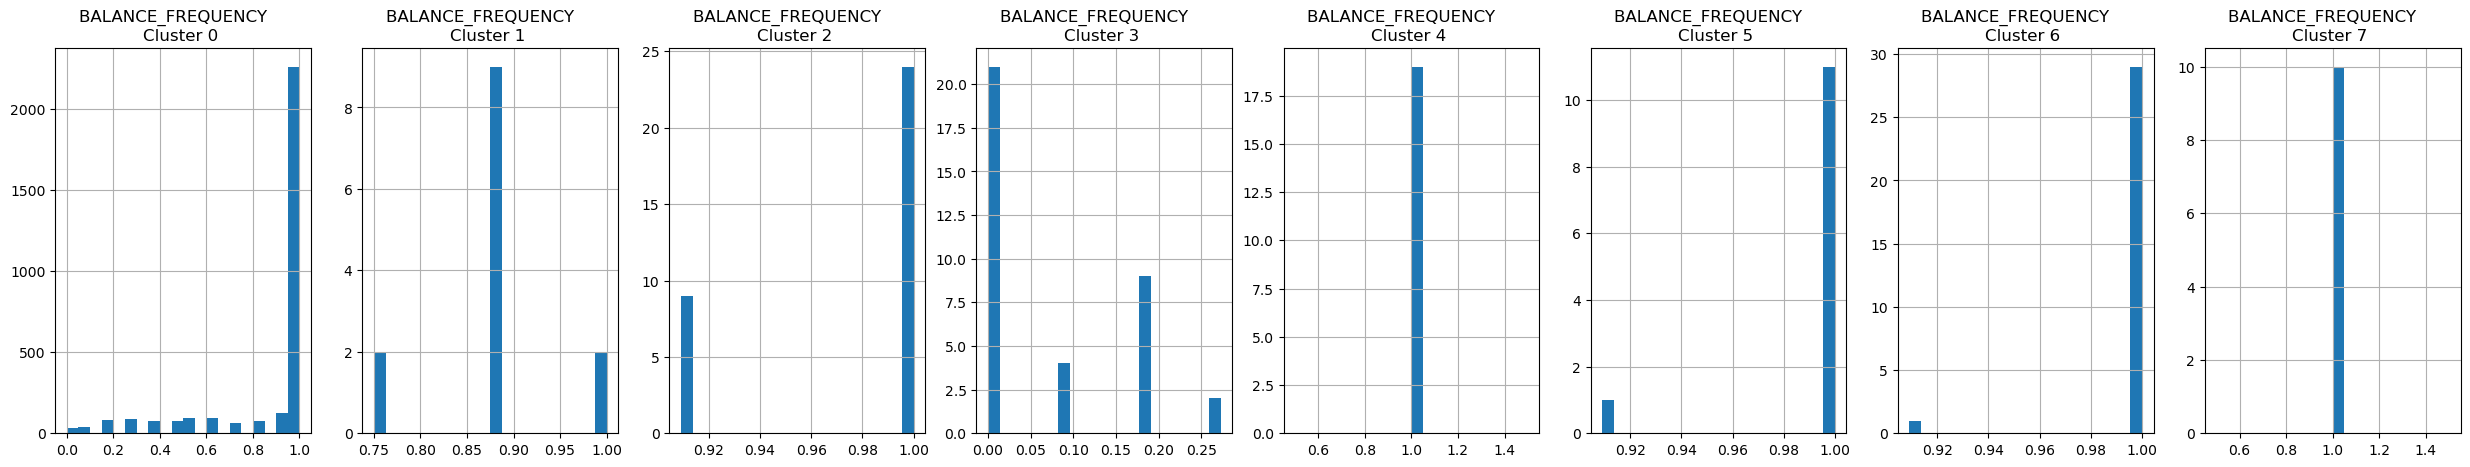

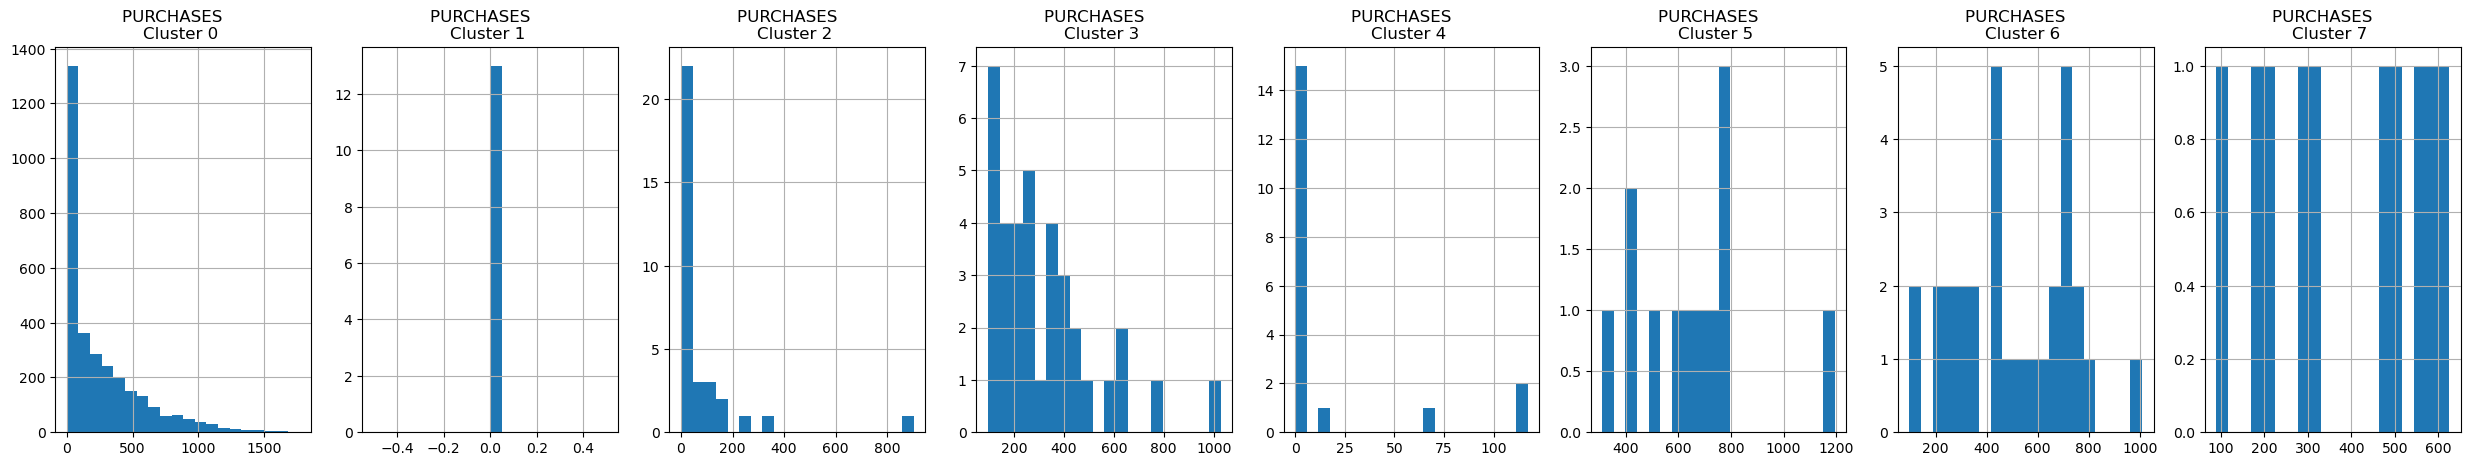

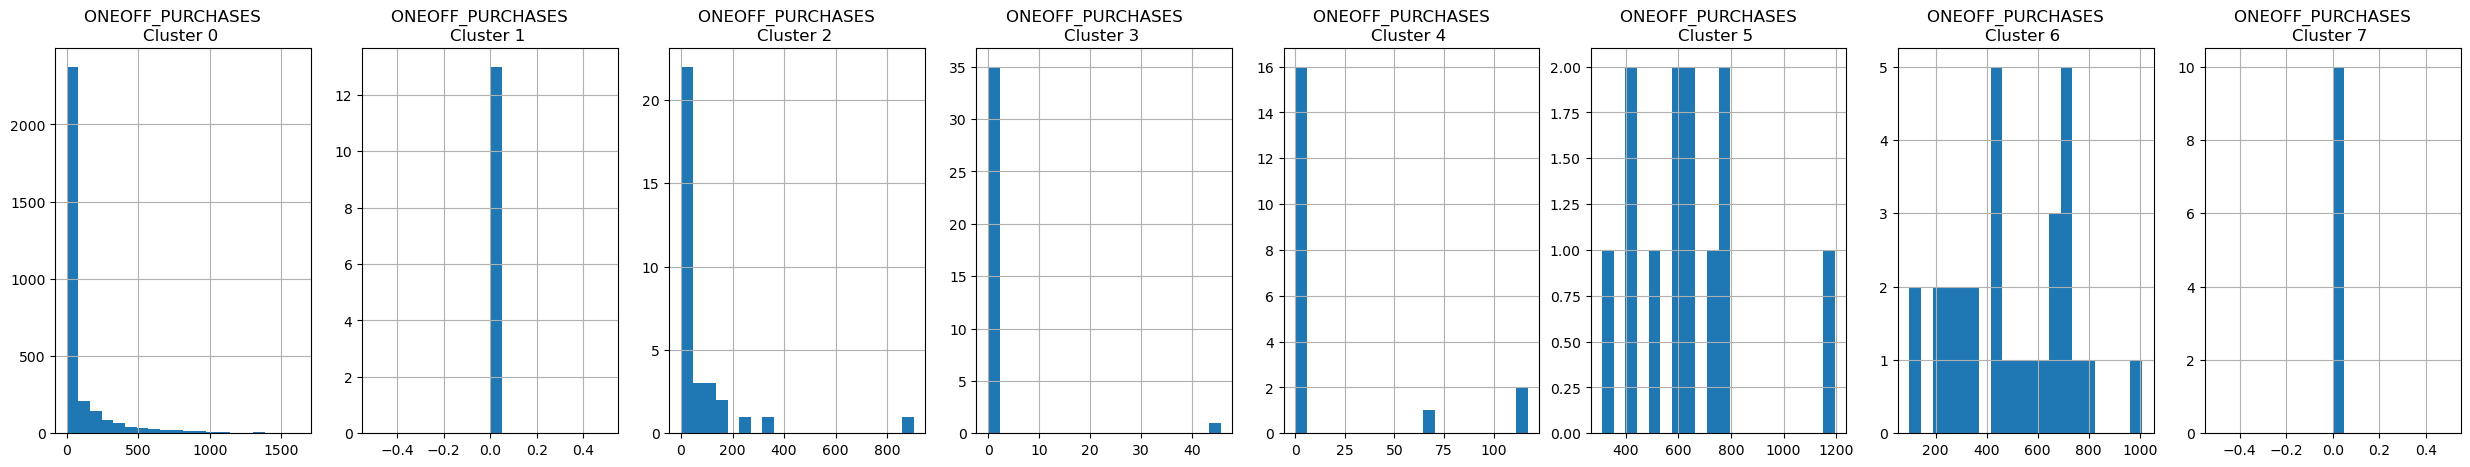

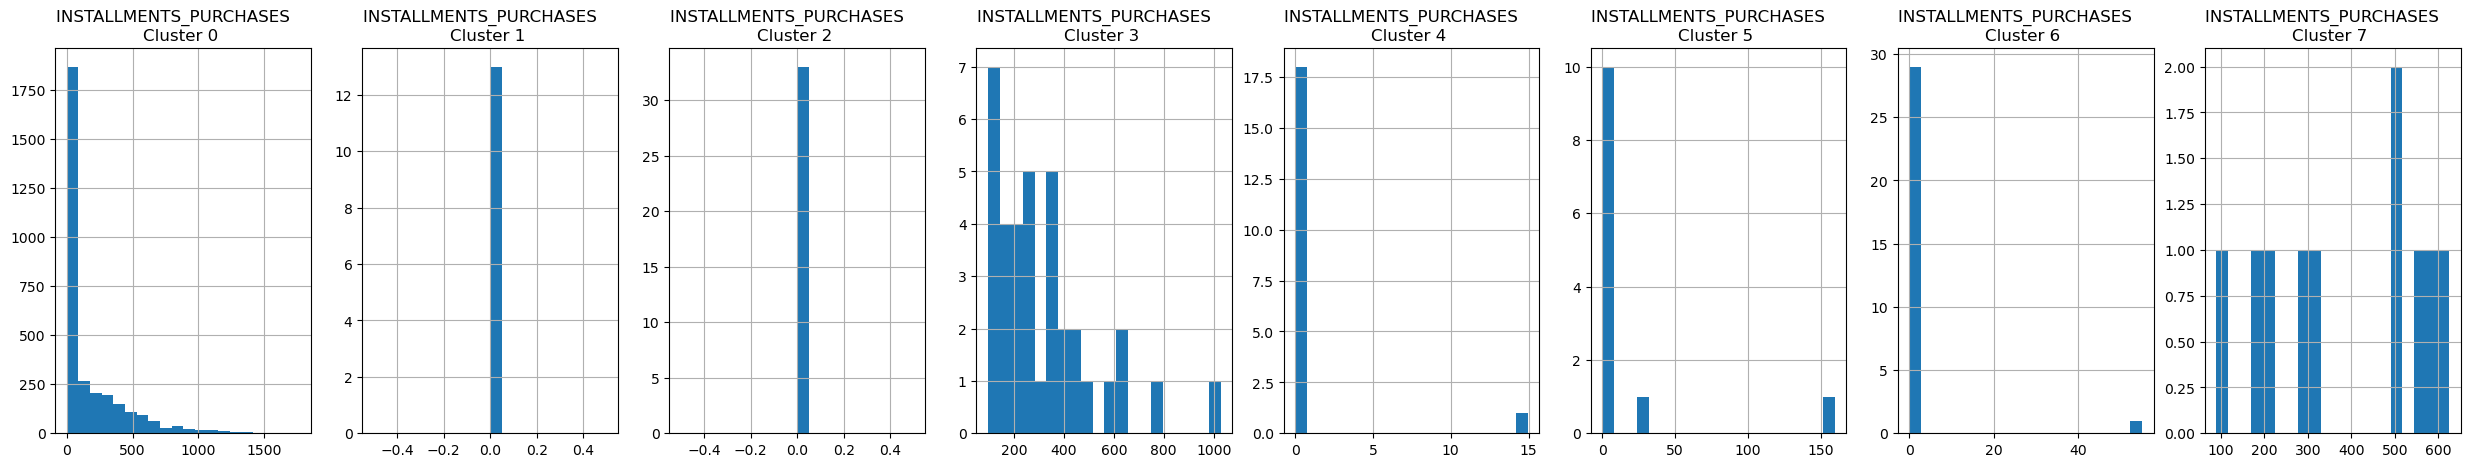

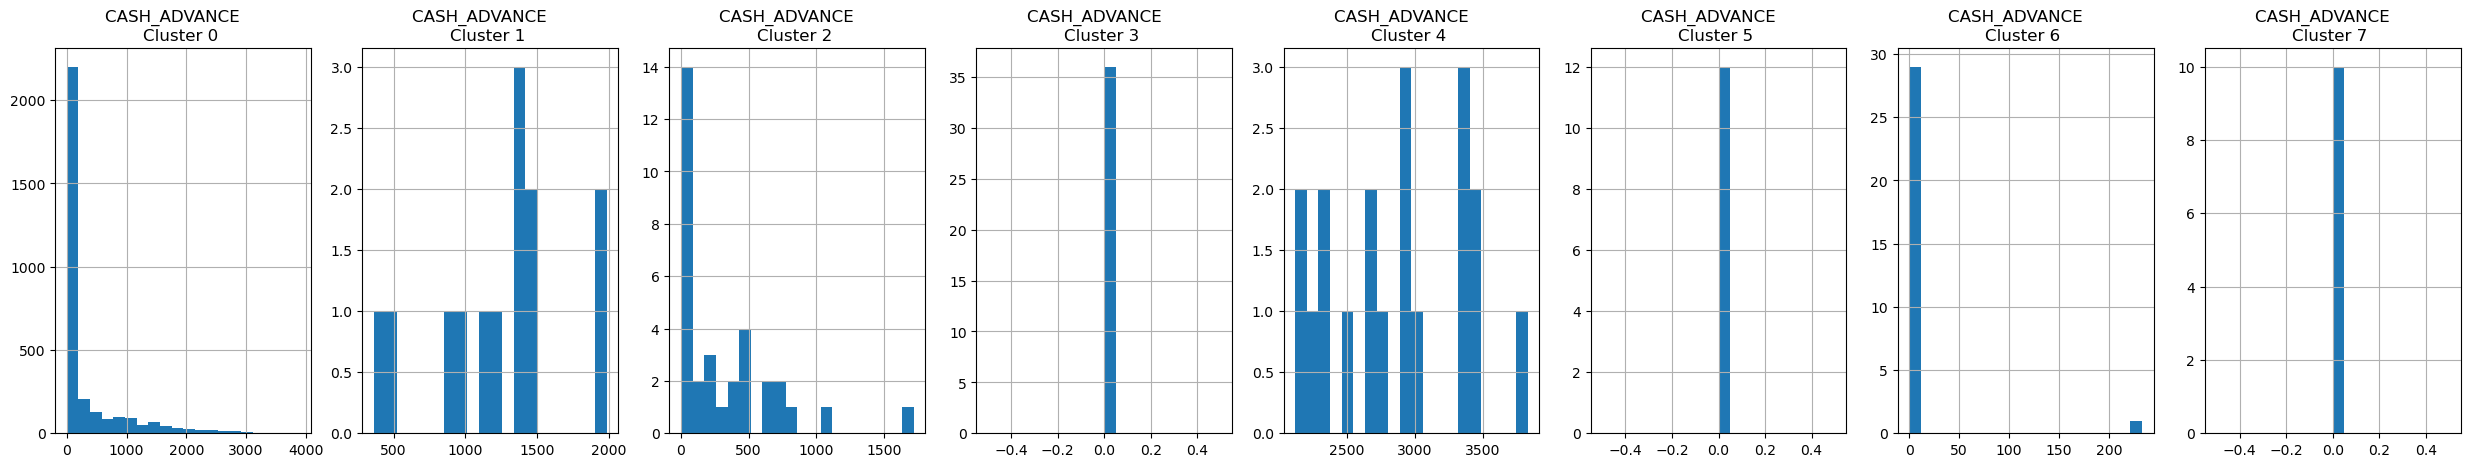

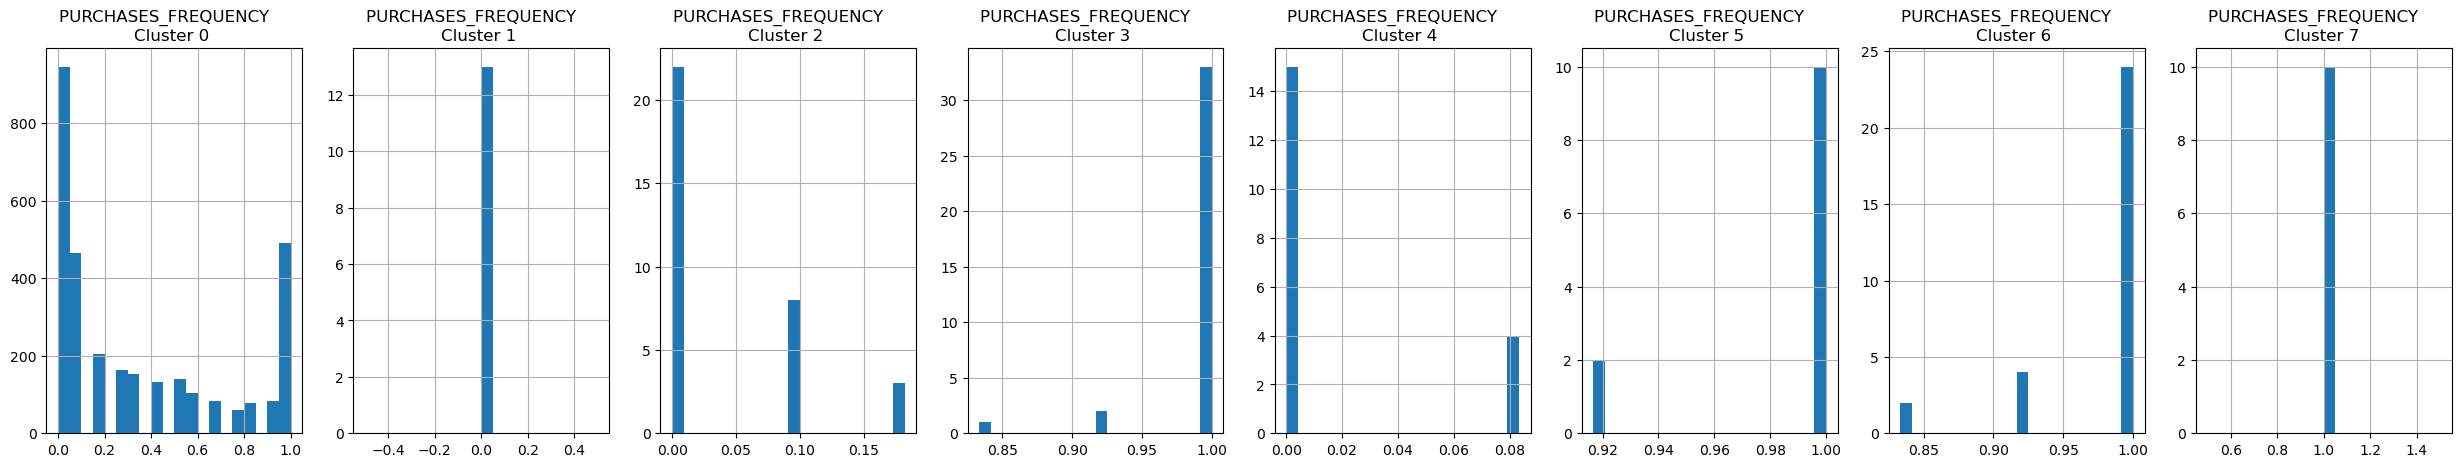

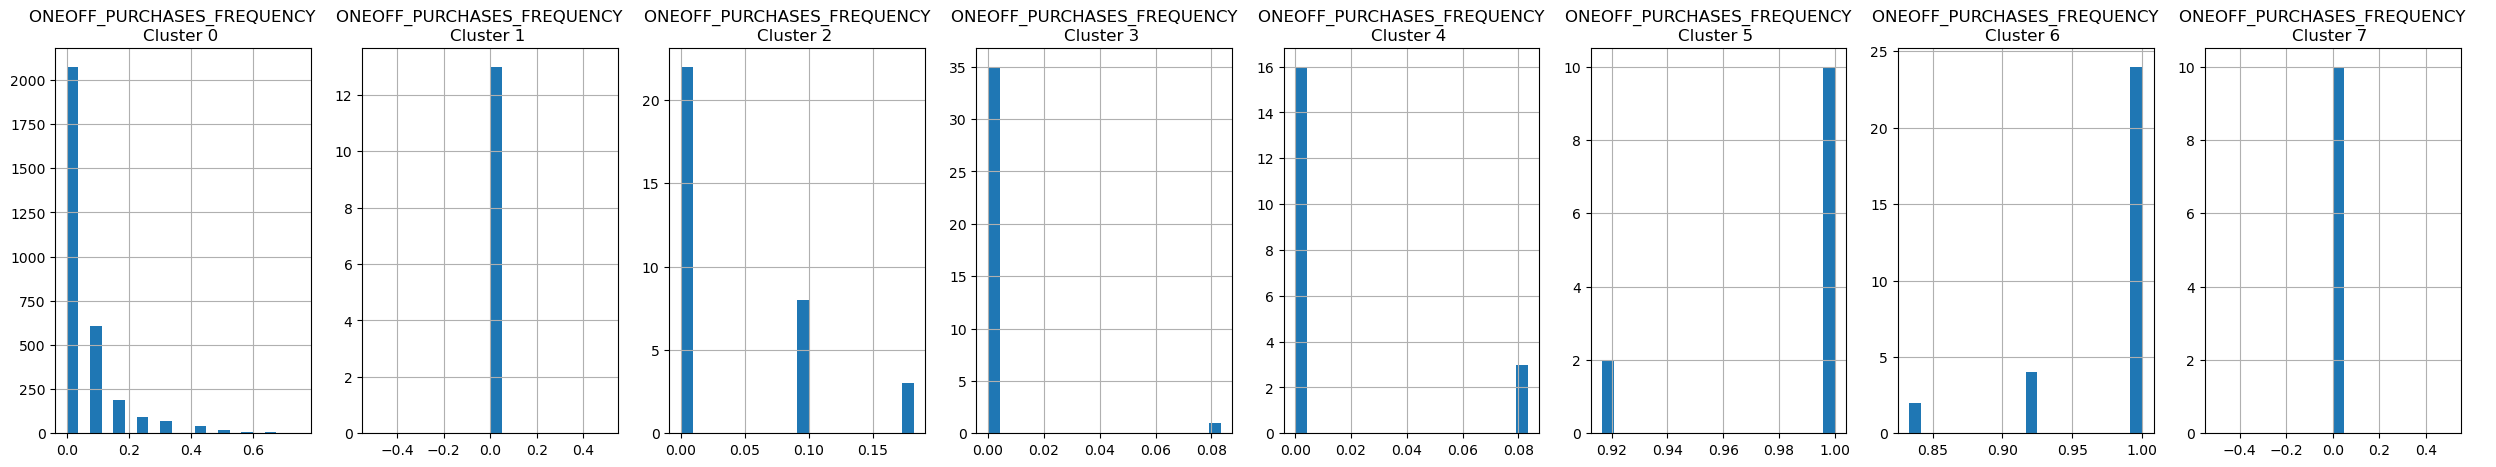

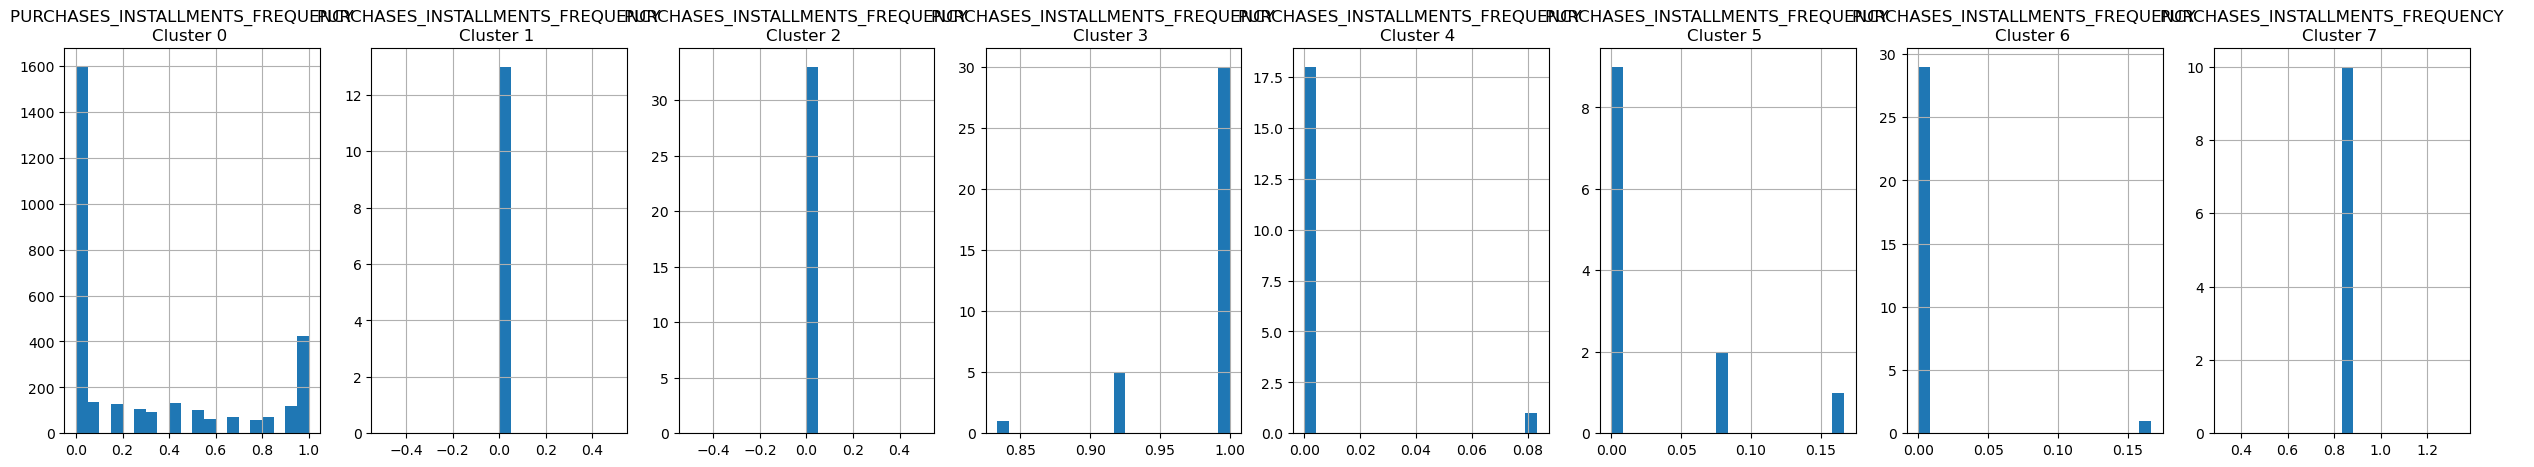

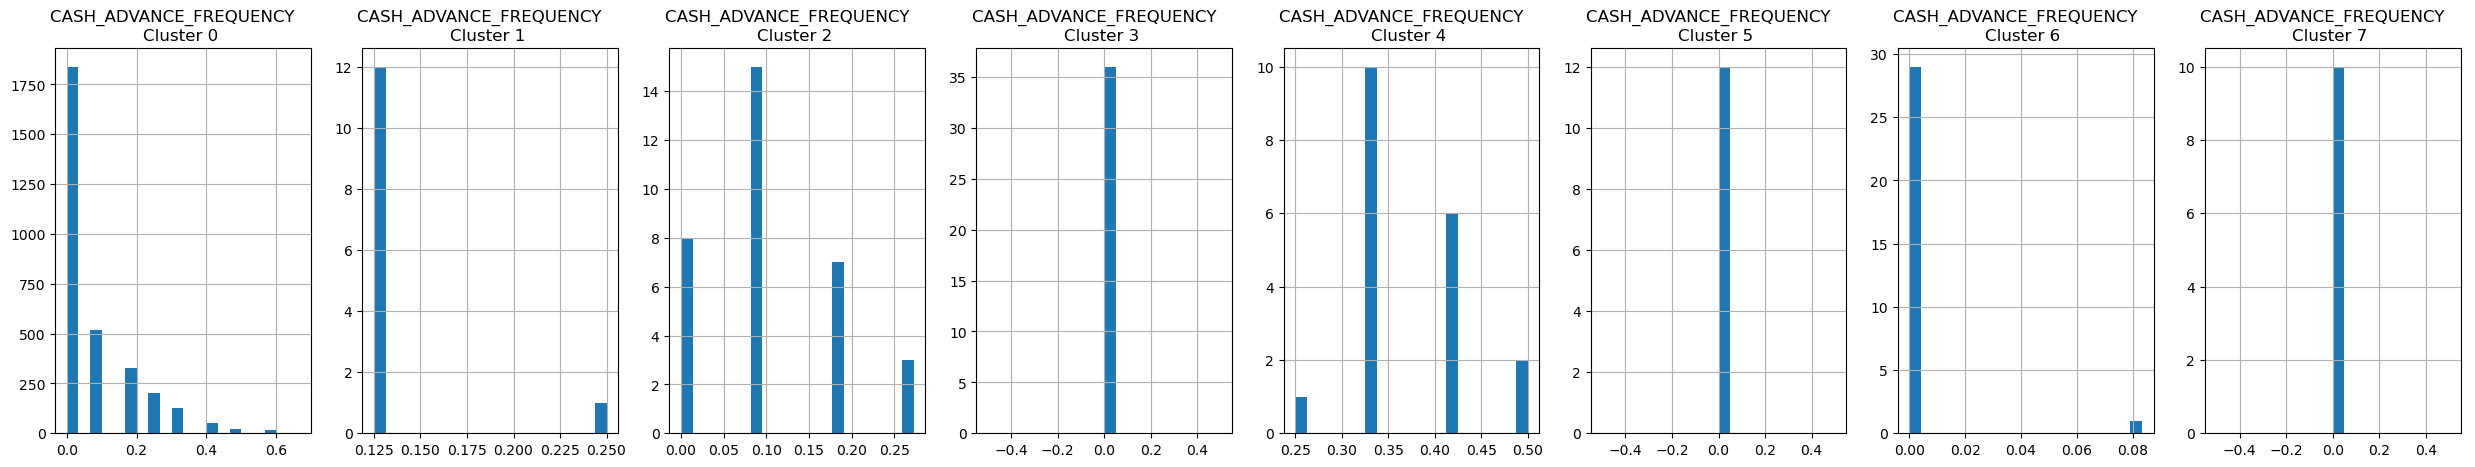

In [ ]:
# Assuming 'creditcard_df' contains your original data and 'labels' contains the cluster labels assigned by DBSCAN

# Plot the histogram o visualize features distribution across clusters.
for feature in creditcard_df.columns:
    plt.figure(figsize=(35, 5))
    unique_labels = np.unique(labels)
    for cluster_label in unique_labels:
        if cluster_label == -1:
            continue
        cluster_data = creditcard_df[labels == cluster_label]
        plt.subplot(1, len(unique_labels), cluster_label + 1)
        cluster_data[feature].hist(bins=20)
        plt.title('{}    \nCluster {} '.format(feature, cluster_label))
    
    plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Define a range of epsilon values to try
eps_range = np.arange(0.1, 1.0, 0.1)

# Loop through each epsilon value
for eps in eps_range:
    # Initialize and fit DBSCAN with the current epsilon value
    dbscan = DBSCAN(eps=eps, min_samples=10)
    dbscan.fit(creditcard_df_scaled)
    
    # Calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(creditcard_df_scaled, dbscan.labels_)
    
    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores for different epsilon values
plt.plot(eps_range, silhouette_scores, 'bx-')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Epsilon for DBSCAN')
plt.show()